In [1]:
from fastai import *
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *
import os


In [2]:
os.getcwd()
os.path.join(os.getcwd(),'images')

'/home/aldrin/code/python-stuff/images'

In [3]:
path=os.path.join(os.getcwd(), 'images')
dls = ImageDataLoaders.from_folder(path,item_tfms=Resize(128),batch_tfms=aug_transforms(),valid_pct=0.2, seed=23, bs=16)
dls.valid_ds.items[:3]

[Path('/home/aldrin/code/python-stuff/images/Edwin/frame_24.jpg'),
 Path('/home/aldrin/code/python-stuff/images/Edwin/frame_40.jpg'),
 Path('/home/aldrin/code/python-stuff/images/Aldrin/frame_48.jpg')]

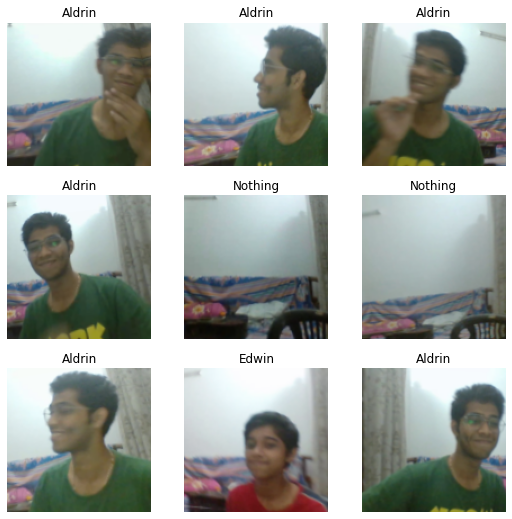

In [4]:
dls.show_batch()

In [5]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

/home/aldrin/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/aldrin/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,1.473284,0.095154,1.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.599926,0.013098,1.000000,00:02
1,0.361669,0.000174,1.000000,00:02
2,0.248694,0.000062,1.000000,00:02
3,0.212987,0.000028,1.000000,00:02
4,0.171443,0.000032,1.000000,00:02


In [6]:
interp=ClassificationInterpretation.from_learner(learn)
 interp.plot_confusion_matrix()

IndentationError: unexpected indent (3717892167.py, line 2)

In [ ]:
interp.plot_top_losses(5, nrows=1)

cleaner = ImageClassifierCleaner(learn)
cleaner

In [19]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [53]:
deleteFromCleaner()
moveFromCleaner()

1  files deleted
0  files moved


In [41]:
def deleteFromCleaner(): 
    deletedFiles = []
    for idx in cleaner.delete(): 
        try:
            cleaner.fns[idx].unlink()
            deletedFiles.append((cleaner.fns[idx],idx))
    #         print('deleted ' , idx)
        except:
            print("error")
    print(len(deletedFiles), " files deleted")

In [42]:
def moveFromCleaner():
    movedFiles = []
    for idx,cat in cleaner.change(): 
        target=path+'/'+cat
        try: 
            shutil.move(str(cleaner.fns[idx]), target)
    #         print("moved ", idx)
            movedFiles.append((cleaner.fns[idx], idx))
        except FileNotFoundError:
            print('File not found error')
    print(len(movedFiles), " files moved")

In [31]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [32]:
img = PILImage.create(uploader.data[0])
person,s,probs = learn.predict(img)
print(actor, s, probs)
print(f"AI says that this is: {person}.")
print(f"Probability it's {person}: {probs[1].item():.6f}")

Aldrin TensorBase(0) TensorBase([1.0000e+00, 1.8079e-06, 2.5012e-06])
AI says that this is: Aldrin.
Probability it's Aldrin: 0.000002


In [18]:
cwd=os.getcwd()
print(cwd)
learnPath=Path(cwd+'/predictor')
print(learnPath)
learn.path=learnPath

/home/aldrin/code/python-stuff
/home/aldrin/code/python-stuff/predictor


In [19]:
learn.export()


In [9]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [10]:
learn_inf = load_learner('export.pkl')

In [11]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [15]:
img = PILImage.create(uploader.data[0])
actor,_,probs = learn_inf.predict(img)
print(f"AI says that this is: {actor}.")
print(f"Probability it's {actor}: {probs[1].item():.6f}")

AI says that this is: Aldrin.
Probability it's Aldrin: 0.000000


In [16]:
img = PILImage.create(uploader.data[0])
learn_inf.predict(img)

('Aldrin', TensorBase(0), TensorBase([9.9998e-01, 3.4685e-09, 1.7532e-05]))

In [17]:
learn_inf.dls.vocab

['Aldrin', 'Edwin', 'Nothing']